In [ ]:
# TODO

# Evaluating the performance of the different search strategies for our SAT-based Bottleneck TSP solver

## Ways to analyze the performance of an optimization algorithm with potentially exponential runtime

* Plot the percentage of instances solved within the time limit for each size. To get a slightly more detailed view, you can plot for different optimality gaps (i.e., the tolerance until which we consider an instance to be solved, despite being not yet optimal.). This plot allows you to estimate up to which size the instances are still solvable by a solver. However, this plot can make it difficult to compare the performance of solvers unless the performances are very different.
* Select a range of instances and create a plot where the x-axis is the time and the y-axis is the number of instances that have been solved within x seconds. See https://www.msoos.org/2013/04/cryptominisat-3-0-released/ for an example that compares different SAT-solvers. Note that this plot only allows you to compare the performance of different solvers, but not the performance of the same solver on different instances.
* Plot the average optimality gap at the time limit. In many cases, the solver will compute upper and lower bounds, allowing to estimate how far the current solution is from the optimal solution. Unfortunately, the optimality gap can be infinite if no solution could be computed within the time limit. Thus, this approach is only suited for solvers that are likely to get within a few percent of the optimal solution within the time limit. These cases are actually quite frequent such that this allows you to compare the quality of the solutions of different solvers. This also allows to integrate heuristics that do not provide bounds, as you could take the best bound of any solver known for the instance.

## Why don't we just plot the runtime?

Because we are dealing with NP-hard problems, the runtime for some instances can be prohibitively long.
Thus, we always have to work with a time limit.
This comes with the problem that we have entries without a solution and the runtime of the time limit, and have to decide how to handle them.
* If we ignore these entries, our benchmark suddenly only analyzes the easy instances.
* If we include them and just plot the runtime, the difficult instances clipped at the time limit will look easier than they are.
* If we assign them a very high runtime, a single outlier can ruin the whole plot.

In conclusion, we cannot just look on the runtime and have to use a more sophisticated measure.

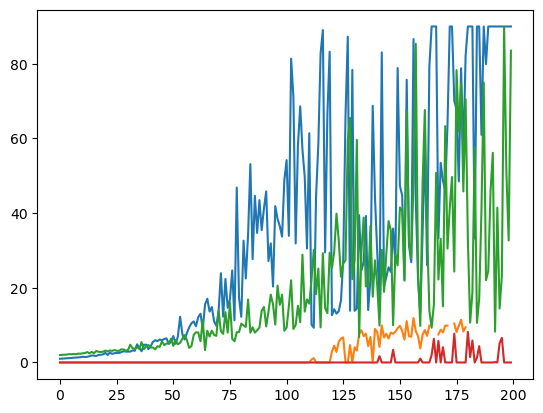

[(1.0, 0), (1.03527189856266, 0), (1.078522423381296, 0), (1.1340749371392687, 0), (1.1670148829070324, 0), (1.2058786663328245, 0), (1.2856959342200929, 0), (1.299111517765546, 0), (1.3481739164201105, 0), (1.4064962762172535, 0), (1.515517632305266, 0), (1.4645181105956118, 0), (1.512896857363496, 0), (1.678070956592156, 0), (1.875044819928415, 0), (1.829955963167511, 0), (1.7401494996725873, 0), (1.998471218176595, 0), (2.07450357592686, 0), (2.1625133237825462, 0), (2.583841520881158, 0), (1.9990372947203767, 0), (2.6437129534076274, 0), (2.309909172449462, 0), (2.4695804212538652, 0), (2.5857870629147555, 0), (2.5264677207084696, 0), (2.7733132186130214, 0), (2.988699908614022, 0), (2.9260240161633377, 0), (2.9033969176101597, 0), (2.919273388696534, 0), (3.236915391949279, 0), (3.1302920454588112, 0), (4.85719025147287, 0), (3.9387741020771445, 0), (3.0085280373249117, 0), (4.737603329211125, 0), (4.77806202776319, 0), (3.5901001529825263, 0), (4.355865974471228, 0), (5.505000529

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [i for i in range(200)]
def f(x: float):
    # exponential function with relative error
    return 1.02 ** (x * np.random.normal(1.0, 0.1))

class PseudoAlg:
    def __init__(self, base: float, std: float, mult: float, time_limit: float):
        self.base = base
        self.std = std
        self.mult = mult
        self.time_limit = time_limit

    def __call__(self, x: float):
        y = self.mult* self.base ** (x * np.random.normal(1.0, self.std))
        if y> self.time_limit:
            time_to_get_first_sol = np.random.normal(0.1, 0.01)*y
            if time_to_get_first_sol > self.time_limit:
                return self.time_limit, float('inf')
            initial_gap = np.random.normal(10, 1)
            gap = initial_gap * (1-(self.time_limit-time_to_get_first_sol)/(y-time_to_get_first_sol))
            return time_to_get_first_sol, gap
        return y, 0

    
alg1 = PseudoAlg(1.04, 0.1, 1, 90)
alg2 = PseudoAlg(1.02, 0.2, 2, 90)   
y = [alg1(i) for i in x]
y_ = [alg2(i) for i in x]
plt.plot(x, y)
plt.plot(x, y_)
plt.show()
print(y)
print(y_)
